Updated: 08/01/2024

This workbook demonstrates the surprisingly good 'final' mode mapping when all modes are mapped in a model with all QNMs up to a given l_max, n_max.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *

sim = qnmfits.SXS(ID=305, zero_time=(2,2))

/data/rvnd2/python_envs/python-3.11-clone/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


[ 4  0 11  3 10  6  2 20  5  1 12 19  9  8 14 31  7 21 22 18 30 13 16 29
 17 15 28 23 24 26 25 27]
['(2, 2, 0, 1)', '(2, -2, 0, 1)', '(3, 3, 0, 1)', '(2, 1, 0, 1)', '(3, 2, 0, 1)', '(3, -2, 0, 1)', '(2, 0, 0, 1)', '(4, 4, 0, 1)', '(3, -3, 0, 1)', '(2, -1, 0, 1)', '(4, -4, 0, 1)', '(4, 3, 0, 1)', '(3, 1, 0, 1)', '(3, 0, 0, 1)', '(4, -2, 0, 1)', '(5, 5, 0, 1)', '(3, -1, 0, 1)', '(5, -5, 0, 1)', '(5, -4, 0, 1)', '(4, 2, 0, 1)', '(5, 4, 0, 1)', '(4, -3, 0, 1)', '(4, 0, 0, 1)', '(5, 3, 0, 1)', '(4, 1, 0, 1)', '(4, -1, 0, 1)', '(5, 2, 0, 1)', '(5, -3, 0, 1)', '(5, -2, 0, 1)', '(5, 0, 0, 1)', '(5, -1, 0, 1)', '(5, 1, 0, 1)']


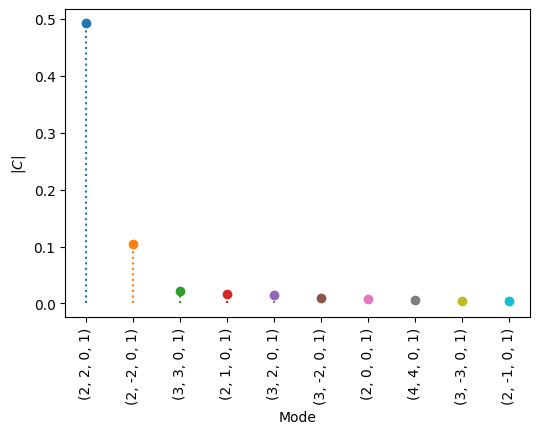

In [76]:

l_max = 5
n_max = 0

t0 = {0:40., 1:18.5, 2:12., 3:8., 4:5.5, 5:3., 6:1.5, 7:0.}[n_max]

QNMs = [(lam,mu,n,1) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)]

best_fit = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    QNMs,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0
)

# Find the indices of the largest values in best_fit_overall['C']
largest_indices = np.argsort(-np.abs(best_fit['C']))

print(largest_indices)

# List the best_fit_overall['mode_labels'] in order of the largest values
sorted_labels = [best_fit['mode_labels'][i] for i in largest_indices]

print(sorted_labels)

# Slice the best_fit_overall['C'] list to include the top 10 highest values
top_10_values = best_fit['C'][largest_indices[:10]]

# Plot the top 10 largest sorted labels
qnmfits.plot_mode_amplitudes(top_10_values, sorted_labels[:10], log=False)

#### Map all QNMs up to l_max, n_max

(This takes ~ 1 min to run for l_max = 4, n_max = 4 and ~10 mins for l_max = 5, n_max = 4)

Notes:

Fitting is not affected by ordering of mapping or QNMs. 

In [78]:
l_max = 4
n_max = 0

t0 = {0:40., 1:18.5, 2:12., 3:8., 4:5.5, 5:3., 6:1.5, 7:0.}[n_max]
"""
mapping = [(lam,mu,n,1) for lam in np.arange(2, l_max+1)
                           for mu in np.arange(-lam, lam+1)
                              for n in np.arange(0, n_max+1)] 


QNMs = [(lam,mu,n,1) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)]

"""

mapping = [(2,2,0,1),(2,-2,0,1),(3,3,0,1),(2,1,0,1),(3,2,0,1),(3,-2,0,1), (2,0,0,1),(4,4,0,1),(3,-3,0,1),(2,-1,0,1)]

QNMs = [(2,2,0,1),(2,-2,0,1),(3,3,0,1),(2,1,0,1),(3,2,0,1),(3,-2,0,1), (2,0,0,1),(4,4,0,1),(3,-3,0,1),(2,-1,0,1)]

best_fit_overall = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs,
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(l,m) for l in np.arange(2, l_max+1)
                                                               for m in np.arange(-l,l+1)])

#### Plot a few mapped modes and compare to the (l_max, m_max, 0, 1) mode

/data/rvnd2/quadratic_qnm/spatial_reconstruction.py:31: RuntimeWarning: invalid value encountered in divide
  ans /= np.max(np.abs(ans)) # normalise peak value


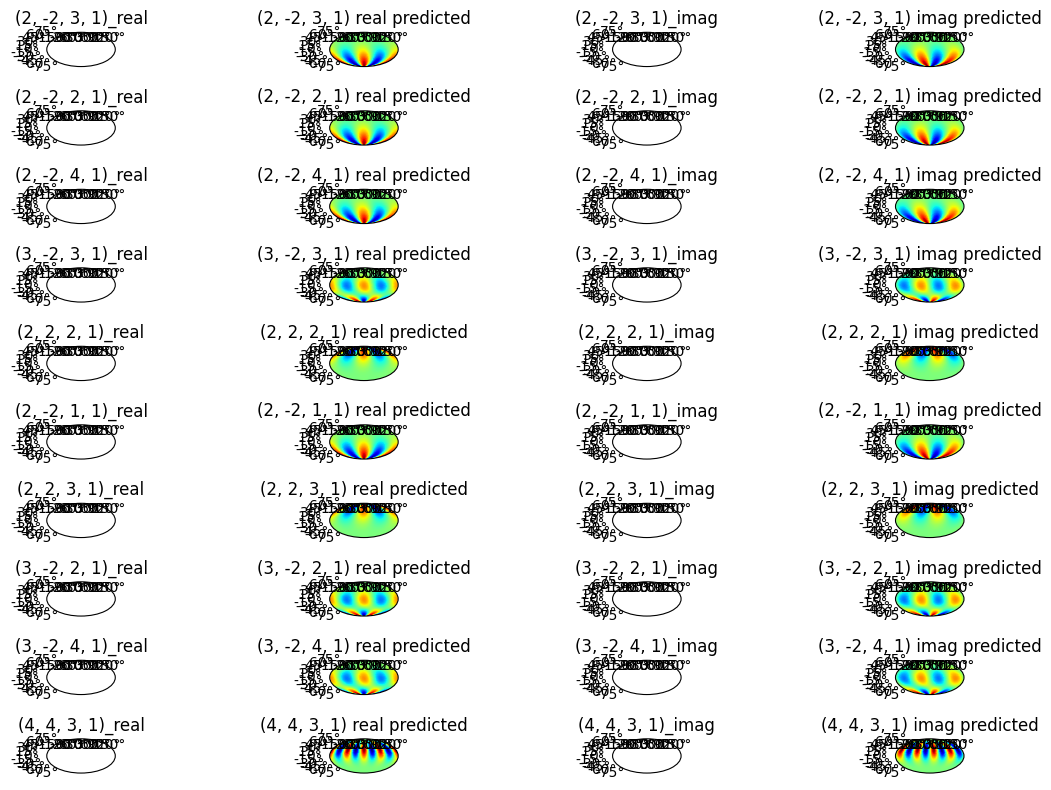

In [79]:
mapping_choice = [(2,2,0,1),(2,-2,0,1),(3,3,0,1),(2,1,0,1),(3,2,0,1),(3,-2,0,1), (2,0,0,1),(4,4,0,1),(3,-3,0,1),(2,-1,0,1)]

fig, axs = plt.subplots(nrows=(len(mapping_choice)), ncols=4, 
                  subplot_kw={'projection': 'mollweide'}, 
                  figsize=(12,8))

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)

Lon, Lat = np.meshgrid(lon, lat)

for i, mode in enumerate(mapping_choice):
   F = mode_mapping(np.pi/2-Lat, Lon, best_fit_overall, mode, l_max)
   G = spheroidal(np.pi/2-Lat, Lon, mode, l_max, sim.chif_mag)

   axs[i, 0].title.set_text(str(mode)+'_real')
   axs[i, 0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.jet)

   axs[i, 1].title.set_text(str(mode)+' real predicted')
   axs[i, 1].pcolormesh(Lon, Lat, np.real(G), cmap=plt.cm.jet)

   axs[i, 2].title.set_text(str(mode)+'_imag')
   axs[i, 2].pcolormesh(Lon, Lat, np.imag(F), cmap=plt.cm.jet)

   axs[i, 3].title.set_text(str(mode)+' imag predicted')
   axs[i, 3].pcolormesh(Lon, Lat, np.imag(G), cmap=plt.cm.jet)

plt.tight_layout()
plt.show()